loaded nodes from pickle


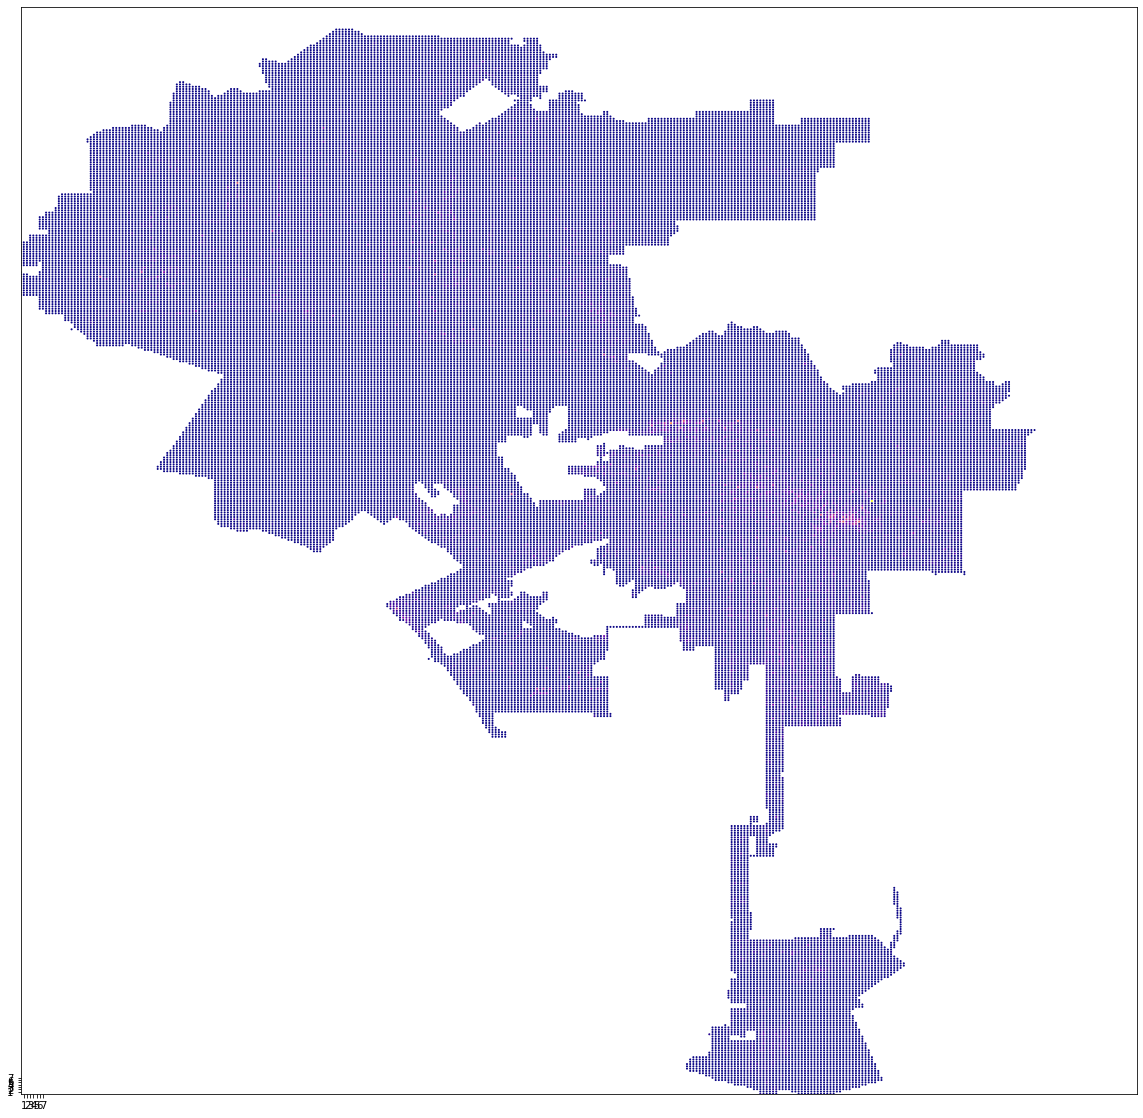

In [1]:
import graph
import models
import plotter

g = graph.Graph()
g.loadGraph("./out/saved_graph_races.pkl")

real_arrest_counts = {ids:len(nodes.pd_reports) for ids, nodes in g.nodes.items()}

plotter.basic_plot(real_arrest_counts)

In [ ]:
import random
import patrols
## Run 50 simulations on all of LA
sim_list = []
uniform_arrest_rate = {node:0.35 for node in g.nodes.keys()}

for t in range(50):
    # run 10 trials
    all_nodes = {}

    for pID in range(1,22):
        while(True):
            start = random.choice(list(g.precincts[pID].values()))
            try:
                path, arrests = patrols.random_walk_precinct(45000, g, start, uniform_arrest_rate)
            except:
                continue
            else:
                all_nodes.update(arrests)
                break

    sim_list.append(all_nodes)
    print(f"Trial {t} complete", end="\r")

In [3]:
import stats
mystore = stats.result(sim_list)

In [1]:
print(mystore[(127, 386)])
print(len(mystore))

NameError: name 'mystore' is not defined

In [5]:
print(len(mystore))
print(len(real_arrest_counts))

55849
55849


In [4]:
ans, (c85,c95,c99) = stats.compare_sims(mystore, real_arrest_counts)
print(f"nodes with 85 confidence: {c85} \nnodes with 95 confidence: {c95} \nnodes with 99 confidence: {c99}")

print(stats.compare_means(mystore, real_arrest_counts))
for i in range(10):
    print(f"Mean of sim #{i} is {stats.sim_mean(sim_list[i])}")
print(f"Mean of real arrests is {stats.sim_mean(real_arrest_counts)}")

nodes with 85 confidence: 5357 
nodes with 95 confidence: 5357 
nodes with 99 confidence: 5357
 There is a <85% confident that the mean of our simulated data matches the mean of the real world data. 
Mean of sim #0 is 6.582660387831474
Mean of sim #1 is 6.577485720424717
Mean of sim #2 is 6.571272538451897
Mean of sim #3 is 6.585041809163996
Mean of sim #4 is 6.5685509140718725
Mean of sim #5 is 6.578434707873015
Mean of sim #6 is 6.572884026571648
Mean of sim #7 is 6.578506329567226
Mean of sim #8 is 6.576089097387599
Mean of sim #9 is 6.587978298626654
Mean of real arrests is 6.050332145606904


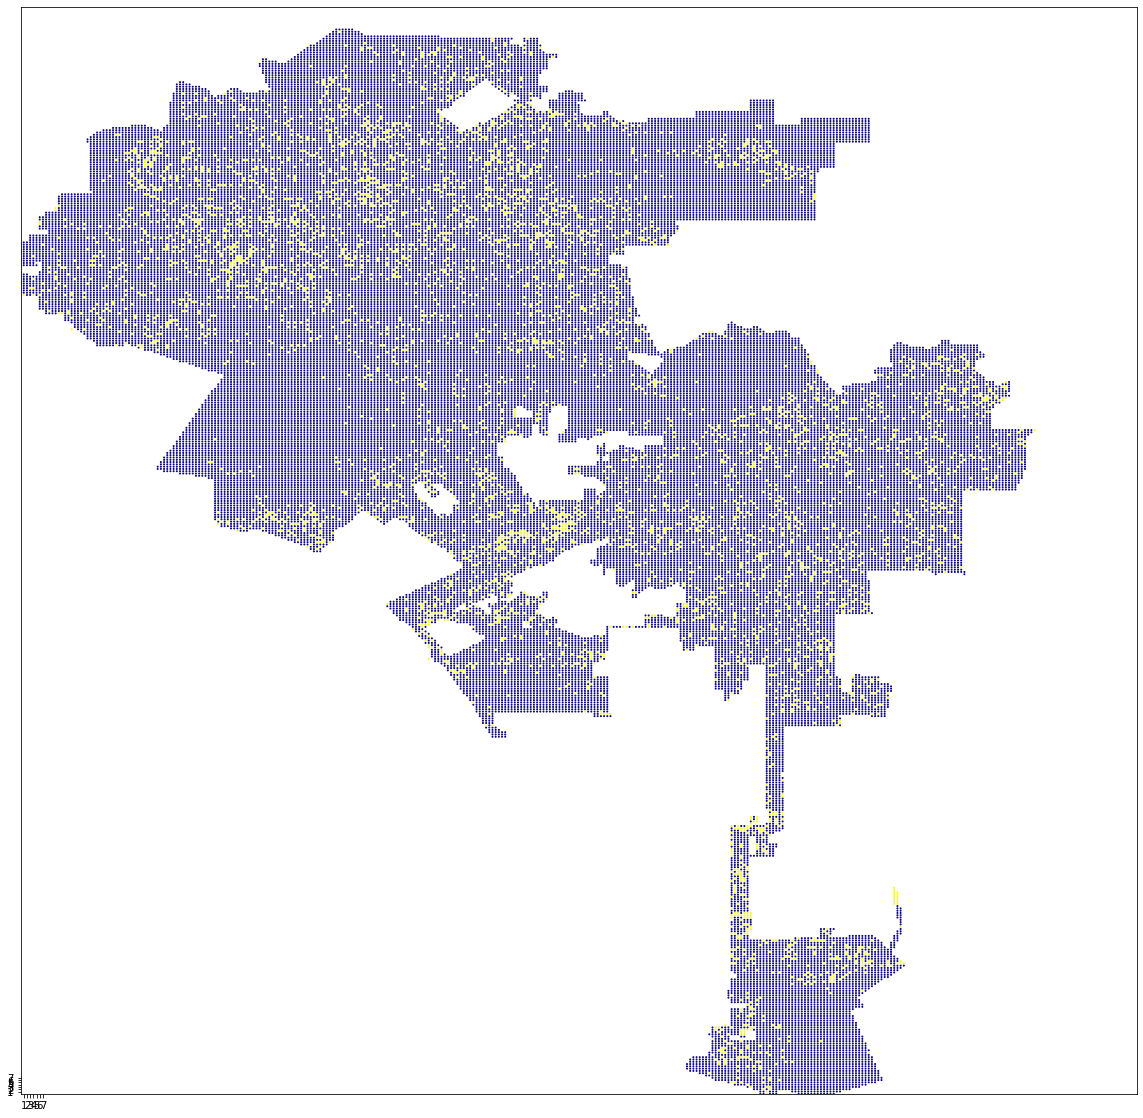

In [5]:
out_nodes = {node_id:sum(tup) for node_id, tup in ans.items()}

plotter.basic_plot(out_nodes)